# IMDB Dataset

The IMDB Dataset consists of 50,000 reviews from the INternet Movie Database. They're are split into 25,000 for training and 25,000 for testing. Each set consists of 50% positive and 50% negative reviews.

## Loading the Dataset
We will only keep the top 10,000 words. Exclusing rare words makes the vector size more managable.

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [2]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


Because we can, here's how to decode the the reviews back into English:

In [3]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_review)

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

## Preparing the Data
We can't feed a list of integers into a neural network. We have to turn the lists into tensors. There are two ways to do this:

- Pad the lists so they are all the same length, turning them into an integer tensor and then having a first layer that can handle such tensors (the Embedding tensor).
- One-hot encode the lists.

We will do the latter. We will do this manually for clarity.

In [4]:
import numpy as np

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [5]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

## Building the Model
Our model will consist of two hidden Dense layers with 16 units each, activated by the ReLU function. The output layer will contain a single unit activated by the Sigmoid function, giving a probability whether the review is positive or negative.

In [6]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

Because our output is a binary probability, it is best to use the `binary_crossentropy` loss function. Crossentropy is usually the best choice when dealing with probabilities: it's from the field of Information Theory and measures the the distance between two probability distributions or, in our case, between the ground-truth distribution and our predictions.

In [7]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Validating our Approach
In order to monitor during training we need to set aside a validation set.


In [8]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [9]:
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 4s 246us/step - loss: 0.5083 - acc: 0.7819 - val_loss: 0.3788 - val_acc: 0.8690
Epoch 2/20
15000/15000 [==============================] - 2s 125us/step - loss: 0.3002 - acc: 0.9045 - val_loss: 0.3000 - val_acc: 0.8900
Epoch 3/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.2178 - acc: 0.9283 - val_loss: 0.3085 - val_acc: 0.8716
Epoch 4/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2839 - val_acc: 0.8839
Epoch 5/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.1425 - acc: 0.9543 - val_loss: 0.2850 - val_acc: 0.8864
Epoch 6/20
15000/15000 [==============================] - 2s 145us/step - loss: 0.1149 - acc: 0.9651 - val_loss: 0.3170 - val_acc: 0.8777
Epoch 7/20
15000/15000 [==============================] - 2s 126us/step - loss: 0.0978 - acc: 0.9710 - val_loss: 0.3129 - 

`model.fit()` returns a `History` object, which has a `history` member, which is a dictionary containing data about everything that happened during training.

In [10]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

We can use Matplotlib to plot the training and validation loss, as well as the training and validation accuracy side-by-side.

In [11]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

<Figure size 640x480 with 1 Axes>

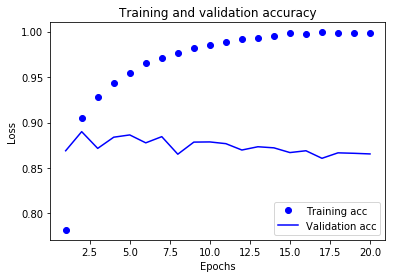

In [12]:
plt.clf()

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']

plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

Our model is overfitting. The Validation loss is minimised around 4 epochs, so lets create a new network and only train it for 4 epochs.

In [13]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)
print(results)

Epoch 1/4
25000/25000 [==============================] - 2s 90us/step - loss: 0.4738 - acc: 0.8211
Epoch 2/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.2673 - acc: 0.9090
Epoch 3/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.2032 - acc: 0.9283
Epoch 4/4
25000/25000 [==============================] - 2s 89us/step
[0.31201616179466246, 0.87556]


## Using a trained network to generate predictions on new data
After having trained the network, we want to use it in a practical setting. We can generate the likelyhood of reviews being positive by using the `predict` method.

In [14]:
model.predict(x_test)

array([[0.15989453],
       [0.99983084],
       [0.39102396],
       ...,
       [0.08095765],
       [0.04848762],
       [0.45435554]], dtype=float32)

# Classifying Newswires
Previously we classfied vector inputs into two mutually exclusive classes. Here's what to do when we've more than two.

## The Reuters Dataset
This is a toy dataset released in 1986 containing short newswires and ther topics. It contains 46 different topics, with at least 10 examples each in the training set.

In [15]:
from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

print(train_data[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]


Like with the IMDB dataset, we can convert the integer vector back into words.

In [16]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])
print(decoded_newswire)

? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


## Preparing the Data

In [17]:
import numpy as np
from keras.utils.np_utils import to_categorical

# Vectorise the integers like in the last example.
def vectorise_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorise_sequences(train_data)
x_test = vectorise_sequences(test_data)

# Vectorise the labels by one-hot encoding them.
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

## Building the network
Because we have 46 output classes now, we'll increase the number of hidden units from 16 to 64. Also, our final dense layer has 46 units (one per class), and the activation function is now the softmax, which results in a probability distribution.

In [18]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

The best loss function to use here is `categorical_crossentropy`, whih measures the distance between two probability distributions.

In [19]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Validating our Approach

In [20]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [21]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 221us/step - loss: 2.5241 - acc: 0.4977 - val_loss: 1.7183 - val_acc: 0.6120
Epoch 2/20
7982/7982 [==============================] - 1s 173us/step - loss: 1.4443 - acc: 0.6889 - val_loss: 1.3496 - val_acc: 0.7090
Epoch 3/20
7982/7982 [==============================] - 1s 176us/step - loss: 1.0993 - acc: 0.7641 - val_loss: 1.1745 - val_acc: 0.7430
Epoch 4/20
7982/7982 [==============================] - 1s 174us/step - loss: 0.8729 - acc: 0.8157 - val_loss: 1.0842 - val_acc: 0.7580
Epoch 5/20
7982/7982 [==============================] - 1s 174us/step - loss: 0.7061 - acc: 0.8490 - val_loss: 0.9868 - val_acc: 0.7820
Epoch 6/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.5696 - acc: 0.8790 - val_loss: 0.9421 - val_acc: 0.8040
Epoch 7/20
7982/7982 [==============================] - 1s 173us/step - loss: 0.4626 - acc: 0.9034 - val_loss: 0.9089 - val_acc: 0.8020


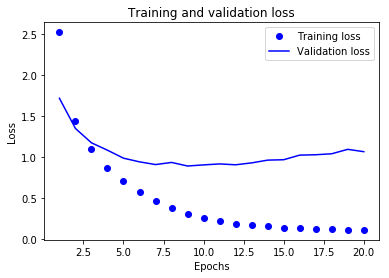

In [22]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

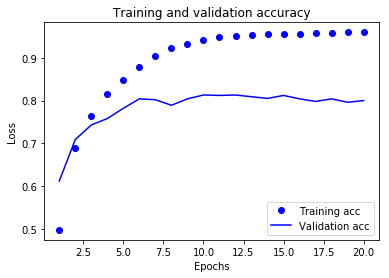

In [23]:
plt.clf()

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

The network starts overfitting at around 9 epochs, so lets train a network from scratch and stop it there.

In [24]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train,
          one_hot_train_labels,
          epochs=9,
          batch_size=512)

results = model.evaluate(x_test, one_hot_test_labels)
print(results)

Epoch 1/9
8982/8982 [==============================] - 2s 179us/step - loss: 2.4437 - acc: 0.5332
Epoch 2/9
8982/8982 [==============================] - 1s 161us/step - loss: 1.3241 - acc: 0.7161
Epoch 3/9
8982/8982 [==============================] - 1s 165us/step - loss: 0.9744 - acc: 0.7869
Epoch 4/9
8982/8982 [==============================] - 1s 162us/step - loss: 0.7565 - acc: 0.8390
Epoch 5/9
8982/8982 [==============================] - 1s 162us/step - loss: 0.5963 - acc: 0.8764
Epoch 6/9
8982/8982 [==============================] - 1s 162us/step - loss: 0.4751 - acc: 0.9009
Epoch 7/9
8982/8982 [==============================] - 1s 161us/step - loss: 0.3831 - acc: 0.9175
Epoch 8/9
8982/8982 [==============================] - 1s 163us/step - loss: 0.3076 - acc: 0.9348
Epoch 9/9
2246/2246 [==============================] - 0s 196us/step
[0.9800314332158674, 0.7902938557966204]


This gives us an accuracy of ~79%. This seems pretty good as a purely random classifier would be closer to 19% (as shown below):

In [25]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19723953695458593

## Generating Predictions on New Data

In [26]:
predictions = model.predict(x_test)

Each entry in `predictions` is a vector of length 46.

In [27]:
predictions[0].shape

(46,)

The sum of the coefficients in this vector sum to 1.

In [28]:
np.sum(predictions[0])

0.99999976

In [29]:
np.argmax(predictions[0])

3

## A different way to handle the labels and the loss

Instead of one-hot encoding the labels like we did earlier, we could instead simple cast the labels to integer tensors like so.

In [30]:
y_train = np.array(train_labels)
y_test = np.array(test_labels)

The only thing this approach changes is the choice of loss function. `categorical_crossentropy` expects the labels follow a categorical encoding. With integer labels, you should use `sparse_categorical_crossentropy`.

In [31]:
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

This function is mathimatically the same as the previous: it just has a different interface.

## The importance of having sufficiently large intermediate layers.

In [32]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=20,
          batch_size=128,
          validation_data=(x_val, y_val))

Train on 7982 samples, validate on 1000 samples
Epoch 1/20
7982/7982 [==============================] - 2s 245us/step - loss: 3.2343 - acc: 0.1244 - val_loss: 2.7022 - val_acc: 0.4120
Epoch 2/20
7982/7982 [==============================] - 2s 248us/step - loss: 2.0997 - acc: 0.5876 - val_loss: 1.8069 - val_acc: 0.6210
Epoch 3/20
7982/7982 [==============================] - 2s 198us/step - loss: 1.5339 - acc: 0.6310 - val_loss: 1.5919 - val_acc: 0.6330
Epoch 4/20
7982/7982 [==============================] - 2s 197us/step - loss: 1.3519 - acc: 0.6406 - val_loss: 1.5242 - val_acc: 0.6330
Epoch 5/20
7982/7982 [==============================] - 2s 199us/step - loss: 1.2434 - acc: 0.6559 - val_loss: 1.5001 - val_acc: 0.6500
Epoch 6/20
7982/7982 [==============================] - 2s 197us/step - loss: 1.1680 - acc: 0.6848 - val_loss: 1.4752 - val_acc: 0.6610
Epoch 7/20
7982/7982 [==============================] - 2s 197us/step - loss: 1.1058 - acc: 0.6938 - val_loss: 1.4819 - val_acc: 0.6680


The model's training accuracy peaks a lot lower, because the 4 hiddeen units in the middle layer is not sufficient for the network to capture the complexity of the data.

# Predicting House Prices: A Regression Example

The two previous examples were considered classification problems. This example is a regression problem, which the goal is to predict a continuous value instead of a discreate label.

## The Boston Housing Price Dataset

We'll attempt to predict the median price of homes in a given Boston suburb in the mid-1970s. This dataset has relatively few datapoints.

In [33]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

print(train_data.shape)
print(test_data.shape)

57344/57026 [==============================] - 1s 9us/step
(404, 13)
(102, 13)


In [34]:
print(train_targets)

[15.2 42.3 50.  21.1 17.7 18.5 11.3 15.6 15.6 14.4 12.1 17.9 23.1 19.9
 15.7  8.8 50.  22.5 24.1 27.5 10.9 30.8 32.9 24.  18.5 13.3 22.9 34.7
 16.6 17.5 22.3 16.1 14.9 23.1 34.9 25.  13.9 13.1 20.4 20.  15.2 24.7
 22.2 16.7 12.7 15.6 18.4 21.  30.1 15.1 18.7  9.6 31.5 24.8 19.1 22.
 14.5 11.  32.  29.4 20.3 24.4 14.6 19.5 14.1 14.3 15.6 10.5  6.3 19.3
 19.3 13.4 36.4 17.8 13.5 16.5  8.3 14.3 16.  13.4 28.6 43.5 20.2 22.
 23.  20.7 12.5 48.5 14.6 13.4 23.7 50.  21.7 39.8 38.7 22.2 34.9 22.5
 31.1 28.7 46.  41.7 21.  26.6 15.  24.4 13.3 21.2 11.7 21.7 19.4 50.
 22.8 19.7 24.7 36.2 14.2 18.9 18.3 20.6 24.6 18.2  8.7 44.  10.4 13.2
 21.2 37.  30.7 22.9 20.  19.3 31.7 32.  23.1 18.8 10.9 50.  19.6  5.
 14.4 19.8 13.8 19.6 23.9 24.5 25.  19.9 17.2 24.6 13.5 26.6 21.4 11.9
 22.6 19.6  8.5 23.7 23.1 22.4 20.5 23.6 18.4 35.2 23.1 27.9 20.6 23.7
 28.  13.6 27.1 23.6 20.6 18.2 21.7 17.1  8.4 25.3 13.8 22.2 18.4 20.7
 31.6 30.5 20.3  8.8 19.2 19.4 23.1 23.  14.8 48.8 22.6 33.4 21.1 13.6
 32.2 13.1

## Preparing the Data

Best practice is to use feature-normalisation. This is subtracting the feature's mean from the feature, and then divinding by the std. This leaves the feature centred at 0 with a unit std.

In [35]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

## Building the Network

In [54]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

The network ends in a single unit with no activation function. This is because any activation funcion would constrain the range of the output.

We are also using the `mse` (mean squared error) as our loss function: the square distance between our predictions and the targets. This is common for regression problems. We are also monitoring the `mae` (mean absolute error), which is the absolute value of the difference between the predictions and the targets.

## Validating with k-Fold validation.

In [55]:
import numpy as np

k = 4
num_val_samples = len(train_data) // k
num_epochs = 100
all_scores = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
              epochs=num_epochs, batch_size=1, verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    
print(all_scores)
print(np.mean(all_scores))

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3
[2.10990566074258, 2.648499602138406, 2.9676132249360037, 2.4146142891137905]
2.5351581942326953


In [56]:
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('Processing fold #', i)
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i + 1) * num_val_samples:]],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_targets[:i * num_val_samples],
         train_targets[(i + 1) * num_val_samples:]],
        axis=0)
    
    model = build_model()
    history = model.fit(partial_train_data, partial_train_targets,
                        validation_data=(val_data, val_targets),
                        epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mean_absolute_error']
    all_mae_histories.append(mae_history)

Processing fold # 0
Processing fold # 1
Processing fold # 2
Processing fold # 3


In [57]:
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]
print(average_mae_history)

[4.575608739758482, 3.370795464751744, 2.9499539526382295, 2.8104298221002715, 2.727688968771755, 2.7844255371849136, 2.5731425403368355, 2.6027384996414185, 2.775004927474673, 2.4973772150455136, 2.4763842349005216, 2.5075647063774635, 2.5699263828815804, 2.510572086466421, 2.3761075628866064, 2.344659536191733, 2.471906086005787, 2.3275888520892303, 2.4350316689746214, 2.4035526455038845, 2.480516031236932, 2.384196718140404, 2.369250013096498, 2.3801682632748444, 2.4659365675236917, 2.3743084185194263, 2.4798054246619197, 2.3543419613696557, 2.533188861195404, 2.3897187993077944, 2.3991825214707028, 2.5189064929981044, 2.453434865073402, 2.5492687555822995, 2.4352266257352166, 2.3138446666226526, 2.44591746707954, 2.292775226111459, 2.47575837550777, 2.353981968199853, 2.347864025890237, 2.581027610467212, 2.3849024359542543, 2.3874275589933487, 2.3157514345527876, 2.4227952496840226, 2.347555835648339, 2.380400485331469, 2.3326267712187057, 2.3215743976064247, 2.294466378665206, 2.

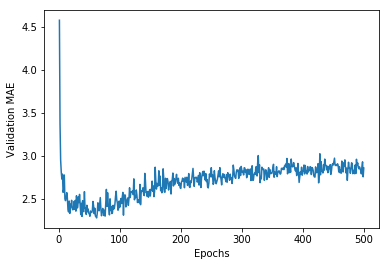

In [58]:
import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

It's a little difficult to see the plot, due to scaling issues and relatively high variance. Let's remove the inital 10 points from the plot, and replace each remaining point with an exponential moving average. 

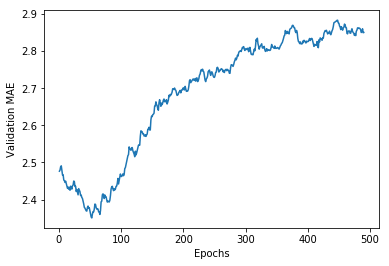

In [62]:
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

## Training the final model

In [63]:
model = build_modelld_model()
model.fit(train_data, train_targets,
          epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(test_mae_score)

102/102 [==============================] - 0s 1ms/step
2.784732884051753
